In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
import warnings
warnings.filterwarnings('ignore')

In [83]:
data = pd.read_csv("uber_trips_dataset_50k.csv")

In [84]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   trip_id         50000 non-null  int64  
 1   driver_id       50000 non-null  int64  
 2   rider_id        50000 non-null  int64  
 3   city            50000 non-null  object 
 4   pickup_lat      50000 non-null  float64
 5   pickup_lng      50000 non-null  float64
 6   drop_lat        50000 non-null  float64
 7   drop_lng        50000 non-null  float64
 8   distance_km     50000 non-null  float64
 9   fare_amount     50000 non-null  float64
 10  status          50000 non-null  object 
 11  payment_method  50000 non-null  object 
 12  pickup_time     50000 non-null  object 
 13  drop_time       50000 non-null  object 
dtypes: float64(6), int64(3), object(5)
memory usage: 5.3+ MB


,trip_id,driver_id,rider_id,pickup_lat,pickup_lng,drop_lat,drop_lng,distance_km,fare_amount
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,25000.500000,5493.954540,55040.994580,38.998664,-97.485552,38.998768,-97.485677,7.008070,15.976205
std,14433.901067,2601.410798,25915.467105,1.155241,14.173744,1.155696,14.173735,2.946744,6.274406
min,1.000000,1000.000000,10001.000000,37.000009,-121.999465,36.953365,-122.047124,0.000000,1.080000
25%,12500.750000,3232.750000,32539.000000,37.994428,-109.818282,37.998237,-109.817260,4.980000,11.510000
50%,25000.500000,5497.000000,55164.000000,38.992589,-97.463042,38.994190,-97.464646,6.980000,15.430000
75%,37500.250000,7746.000000,77293.500000,39.999602,-85.190954,39.998849,-85.199652,9.000000,19.910000
max,50000.000000,9998.000000,99998.000000,40.999937,-73.001961,41.047536,-72.963476,19.410000,50.670000


In [85]:
data.isnull().sum()

trip_id           0
driver_id         0
rider_id          0
city              0
pickup_lat        0
pickup_lng        0
drop_lat          0
drop_lng          0
distance_km       0
fare_amount       0
status            0
payment_method    0
pickup_time       0
drop_time         0
dtype: int64

In [86]:
data.columns.tolist()

['trip_id',
 'driver_id',
 'rider_id',
 'city',
 'pickup_lat',
 'pickup_lng',
 'drop_lat',
 'drop_lng',
 'distance_km',
 'fare_amount',
 'status',
 'payment_method',
 'pickup_time',
 'drop_time']

In [87]:
data.head()

,trip_id,driver_id,rider_id,city,pickup_lat,pickup_lng,drop_lat,drop_lng,distance_km,fare_amount,status,payment_method,pickup_time,drop_time
0,1,8270,10683,San Francisco,37.170931,-77.586479,37.173652,-77.619934,2.97,10.71,Completed,Wallet,2023-01-01 00:00:00,2023-01-01 00:08:54.600000000
1,2,1860,44743,Boston,38.898127,-108.582977,38.937464,-108.558727,8.43,22.41,Completed,UPI,2023-01-01 00:01:00,2023-01-01 00:26:17.400000000
2,3,6390,75839,San Francisco,38.814571,-89.942603,38.821702,-89.896435,5.46,12.91,Completed,Cash,2023-01-01 00:02:00,2023-01-01 00:18:22.800000000
3,4,6191,22189,New York,37.295906,-75.328844,37.301375,-75.317488,6.61,15.70,Completed,Wallet,2023-01-01 00:03:00,2023-01-01 00:22:49.800000000
4,5,6734,61104,Seattle,38.972395,-121.482913,38.992088,-121.467904,10.50,19.15,Completed,Wallet,2023-01-01 00:04:00,2023-01-01 00:35:30.000000000


In [88]:
data.drop(columns=['trip_id','driver_id','rider_id','pickup_time','drop_time'],inplace=True)

In [89]:
data.columns

Index(['city', 'pickup_lat', 'pickup_lng', 'drop_lat', 'drop_lng',
       'distance_km', 'fare_amount', 'status', 'payment_method'],
      dtype='object')

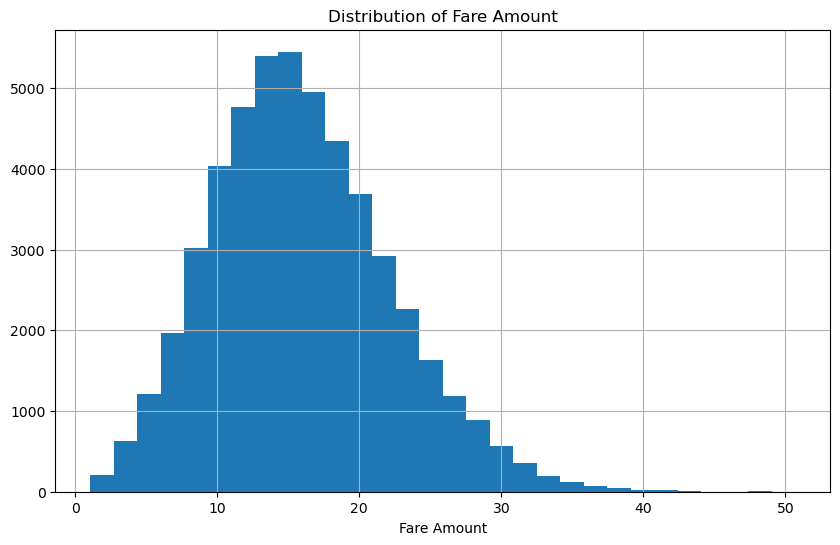

In [90]:
#taking_fare_amount_as_target_variable
plt.figure(figsize=(10,6))
data['fare_amount'].hist(bins=30)
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.show()

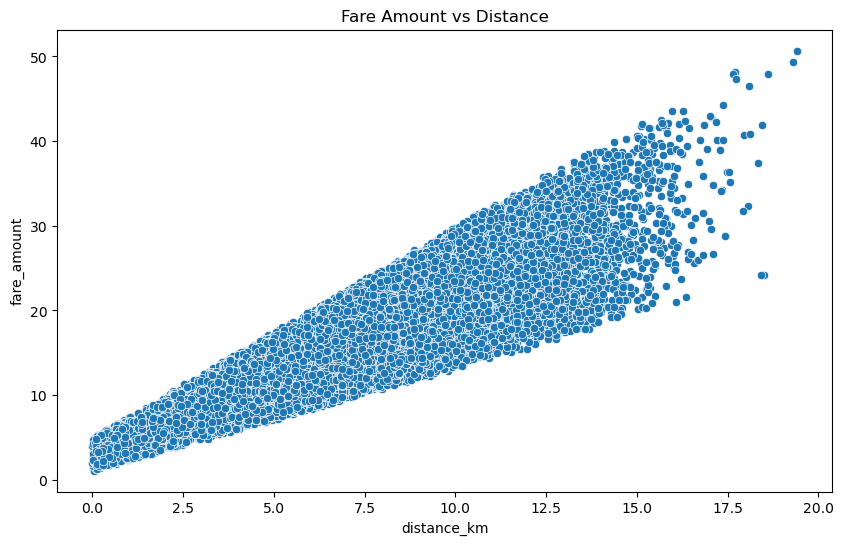

In [91]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=data['distance_km'],y=data['fare_amount'])
plt.title('Fare Amount vs Distance')
plt.show()

In [92]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler , OneHotEncoder 
from sklearn.impute import SimpleImputer

In [93]:
X = data.drop(['fare_amount'],axis=1)
y=data['fare_amount']

In [94]:
num_cols = x.select_dtypes(include=['int64','float64']).columns.tolist()
cat_cols = x.select_dtypes(include=['object']).columns.tolist()

In [95]:
num_pipeline= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
])
cat_pipeline= Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore'))
])

In [96]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_pipeline,num_cols),  
    ('cat',cat_pipeline,cat_cols)])

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

In [99]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha=0.01),
    "Ridge Regression": Ridge(alpha=1.0),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "SVR": SVR(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100, random_state=42, n_jobs=-1
    )
}


In [100]:
results = []

for name, model in models.items():
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])
    
    pipe.fit(X_train, y_train)
    
    y_pred = pipe.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    results.append({
        "Model": name,
        "R2 Score": r2,
        "MAE": mae,
        "MSE": mse
    })
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by="R2 Score", ascending=False)

In [101]:
print(results_df)

               Model  R2 Score       MAE        MSE
0  Linear Regression  0.761053  2.487336   9.619474
2   Ridge Regression  0.761041  2.487407   9.619938
1   Lasso Regression  0.761017  2.487409   9.620920
4                SVR  0.753482  2.510067   9.924244
5      Random Forest  0.741632  2.565521  10.401317
3      Decision Tree  0.502639  3.453787  20.022603
